In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

print(f"Numpy: {np.__version__}")
print(f"Pandas: {pd.__version__}")
print(f"Seaborn: {sns.__version__}")
print(f"Scikit-learn: {sklearn.__version__}")


Numpy: 1.26.1
Pandas: 2.2.3
Seaborn: 0.13.0
Scikit-learn: 1.3.2


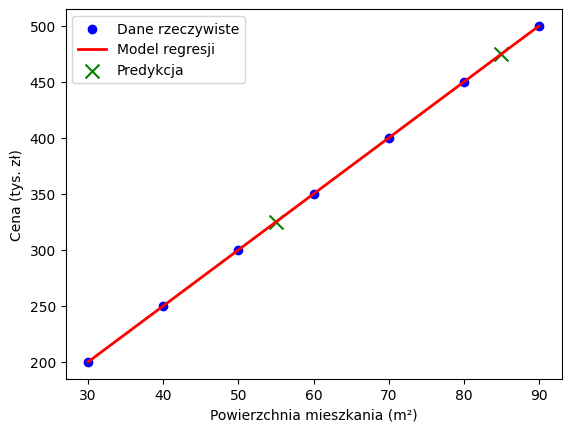

In [3]:

from sklearn.linear_model import LinearRegression

# Dane: powierzchnia mieszkania (m²) i cena (tys. zł)
X = np.array([30, 40, 50, 60, 70, 80, 90]).reshape(-1, 1)
y = np.array([200, 250, 300, 350, 400, 450, 500])

# Tworzenie modelu
model = LinearRegression()
model.fit(X, y)  # Trenowanie modelu

# Predykcja dla nowych wartości
X_new = np.array([55, 85]).reshape(-1, 1)
y_pred = model.predict(X_new)

# Wizualizacja
plt.scatter(X, y, color='blue', label="Dane rzeczywiste")
plt.plot(X, model.predict(X), color='red', linewidth=2, label="Model regresji")
plt.scatter(X_new, y_pred, color='green', marker='x', s=100, label="Predykcja")
plt.xlabel("Powierzchnia mieszkania (m²)")
plt.ylabel("Cena (tys. zł)")
plt.legend()
plt.show()


In [4]:
X

array([[30],
       [40],
       [50],
       [60],
       [70],
       [80],
       [90]])

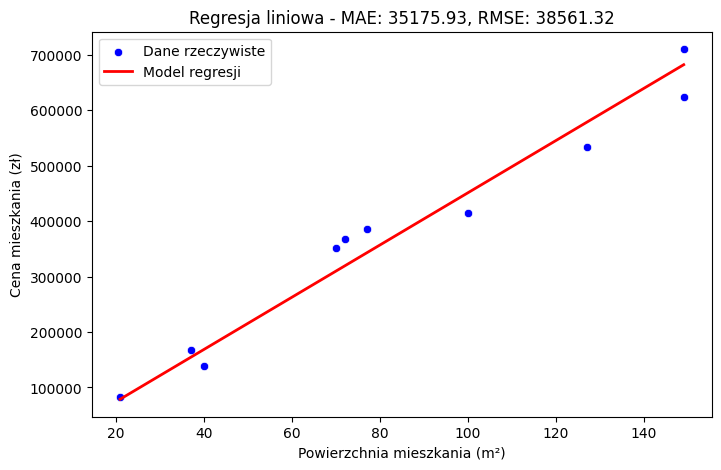

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 📌 1. Generowanie danych - powierzchnia mieszkania i cena
np.random.seed(42)
X = np.random.randint(20, 150, 50).reshape(-1, 1)  # Powierzchnia (m²)
y = X.ravel() * 4500 + np.random.randint(-50000, 50000, 50)  # Cena mieszkania (zł)

# 📌 2. Podział danych na zbiór treningowy i testowy (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 3. Trenowanie modelu regresji liniowej
model = LinearRegression()
model.fit(X_train, y_train)

# 📌 4. Predykcja na zbiorze testowym
y_pred = model.predict(X_test)

# 📌 5. Ocena modelu
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# 📌 6. Wizualizacja wyników
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test.ravel(), y=y_test, color='blue', label='Dane rzeczywiste')
sns.lineplot(x=X_test.ravel(), y=y_pred, color='red', linewidth=2, label='Model regresji')
plt.xlabel("Powierzchnia mieszkania (m²)")
plt.ylabel("Cena mieszkania (zł)")
plt.legend()
plt.title(f"Regresja liniowa - MAE: {mae:.2f}, RMSE: {rmse:.2f}")
plt.show()

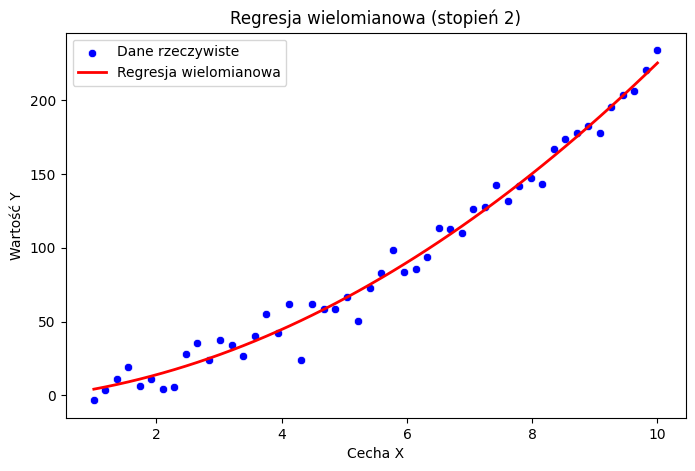

In [6]:
from sklearn.preprocessing import PolynomialFeatures

# 📌 1. Generowanie nieliniowych danych
X = np.linspace(1, 10, 50).reshape(-1, 1)  # Zakres 1-10
y = 2 * X.ravel()**2 + 3 * X.ravel() + np.random.randn(50) * 10  # Funkcja kwadratowa z szumem

# 📌 2. Transformacja na cechy wielomianowe (np. x², x³)
poly = PolynomialFeatures(degree=2)  # Stopień wielomianu = 2
X_poly = poly.fit_transform(X)

# 📌 3. Trenowanie modelu regresji wielomianowej
model_poly = LinearRegression()
model_poly.fit(X_poly, y)

# 📌 4. Predykcja na nowych danych
y_pred_poly = model_poly.predict(X_poly)

# 📌 5. Wizualizacja
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X.ravel(), y=y, color='blue', label="Dane rzeczywiste")
sns.lineplot(x=X.ravel(), y=y_pred_poly, color='red', linewidth=2, label="Regresja wielomianowa")
plt.xlabel("Cecha X")
plt.ylabel("Wartość Y")
plt.legend()
plt.title("Regresja wielomianowa (stopień 2)")
plt.show()
